### The purpose of this tutorial is to walk through the execution of this code, starting with inputs and calculating the displacements and forces on the matrix defined. 

In [247]:
#Import Libraries

import numpy as np
import matplotlib.pyplot as plt
from src import *

In [248]:
# Define inputs
E_a = 10000  # Young's Modulus (Pa)
nu_a = 0.3  # Poisson's Ratio
#Radius and Area
r = 1
A_a = np.pi * r**2 
#Moments of Inertia
Iy_a = np.pi * r**4 / 4
Iz_a = np.pi * r**4 / 4
Irho_a = np.pi * r**4 / 2
J_a = np.pi * r**4 / 2

E_b = 50000  # Young's Modulus (Pa)
nu_b = 0.3  # Poisson's Ratio
#Radius and Area
b = 0.5 
h = 1 
A_b = b*h
#Moments of Inertia
Iy_b = h*b**3 /12
Iz_b = b * h**3 /12
Irho_b = b * h /12 * (b**2 + h**2)
J_b = 0.02861



#Define Nodes (x,y,z, node_id)
nodes = np.array([
    [0, 0, 0, 0],
    [15, 0, 0, 1],
    [15, 30, 0, 2],
    [0, 30, 0, 3],
    [0, 0, 14, 4],
    [15, 0, 14, 5],
    [15, 30, 14, 6],
    [0, 30, 14, 7],
    [0, 0, 30, 8],
    [15, 0, 30, 9],
    [15, 30, 30, 10],
    [0, 30, 30, 11],
])

#Connect the Nodes
elements_a = np.array([
    [0, 4],
    [1, 5], 
    [2, 6],  
    [3, 7], 
    [4, 8],
    [5, 9], 
    [6, 10],  
    [7, 11],
])

elements_b = np.array([
    [4, 5],
    [5, 6], 
    [6, 7],  
    [7, 4], 
    [8, 9],
    [9, 10], 
    [10, 11],  
    [11, 8],
])

#Assign constraints
# (0.0, 0.0, 0.0, 0.0, 0.0, 0.0) = fixed node
# (0.0, 0.0, 0.0, None, None, None) = pinned node
# (None, None, None, None, None, None) = free node
fixed_nodes = {
    0: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 
    1: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 
    2: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0),  
    3: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 
}

loads = {
    8:  (0, 0, 1, 0.0, 0.0, 0),
    9:  (0, 0, 1, 0.0, 0.0, 0),
    10: (0, 0, 1, 0.0, 0.0, 0),
    11: (0, 0, 1, 0.0, 0.0, 0),
}

### Compute Displacements and Forces


In [249]:
# --- Analysis and Plotting ---
# Set up boundary conditions
beam = Beam(nodes, elements, E_a, nu_a, A_a, Iy_a, Iz_a, Irho_a, J_a)
beam.add = Beam(nodes, elements_b, E_b, nu_b, A_b, Iy_b, Iz_b, Irho_b, J_b)

bc = BoundaryCondition(fixed_nodes)
for node_id, load in loads.items():
    bc.apply_load(node_id, load)

# Run the analysis
solver = BeamSolver(beam, bc)
displacements, reactions = solver.solve()
print("Static Analysis Results:")
solver.display_results(displacements, reactions) 
print("Internal Forces per Element:")
for elem_id, forces in solver.internal_forces.items():
    print(f"Element {elem_id}: {np.round(forces, 5)}")



Static Analysis Results:
Node 0 Displacements: [dX: 0.0, dY: 0.0, dZ: 0.0, RX: 0.0, RY: 0.0, RZ: 0.0]
Node 0 Reactions: [FX: 0.0, FY: -0.0, FZ: -1.0, MX: 0.0, MY: 0.0, MZ: -0.0]
---
Node 1 Displacements: [dX: 0.0, dY: 0.0, dZ: 0.0, RX: 0.0, RY: 0.0, RZ: 0.0]
Node 1 Reactions: [FX: 0.0, FY: -0.0, FZ: -1.0, MX: 0.0, MY: 0.0, MZ: -0.0]
---
Node 2 Displacements: [dX: 0.0, dY: 0.0, dZ: 0.0, RX: 0.0, RY: 0.0, RZ: 0.0]
Node 2 Reactions: [FX: 0.0, FY: -0.0, FZ: -1.0, MX: 0.0, MY: 0.0, MZ: -0.0]
---
Node 3 Displacements: [dX: 0.0, dY: 0.0, dZ: 0.0, RX: 0.0, RY: 0.0, RZ: 0.0]
Node 3 Reactions: [FX: 0.0, FY: -0.0, FZ: -1.0, MX: 0.0, MY: 0.0, MZ: -0.0]
---
Node 4 Displacements: [dX: -0.0, dY: 0.0, dZ: 0.00045, RX: -0.0, RY: -0.0, RZ: 0.0]
Node 4 Reactions: [FX: 0.0, FY: 0.0, FZ: 0.0, MX: 0.0, MY: 0.0, MZ: 0.0]
---
Node 5 Displacements: [dX: -0.0, dY: 0.0, dZ: 0.00045, RX: -0.0, RY: -0.0, RZ: 0.0]
Node 5 Reactions: [FX: 0.0, FY: 0.0, FZ: 0.0, MX: 0.0, MY: 0.0, MZ: 0.0]
---
Node 6 Displacements: [dX

### Elastic Critical Mode Analysis

Elastic Critical Load Factor [120.3270475  166.63475764 189.93531413]


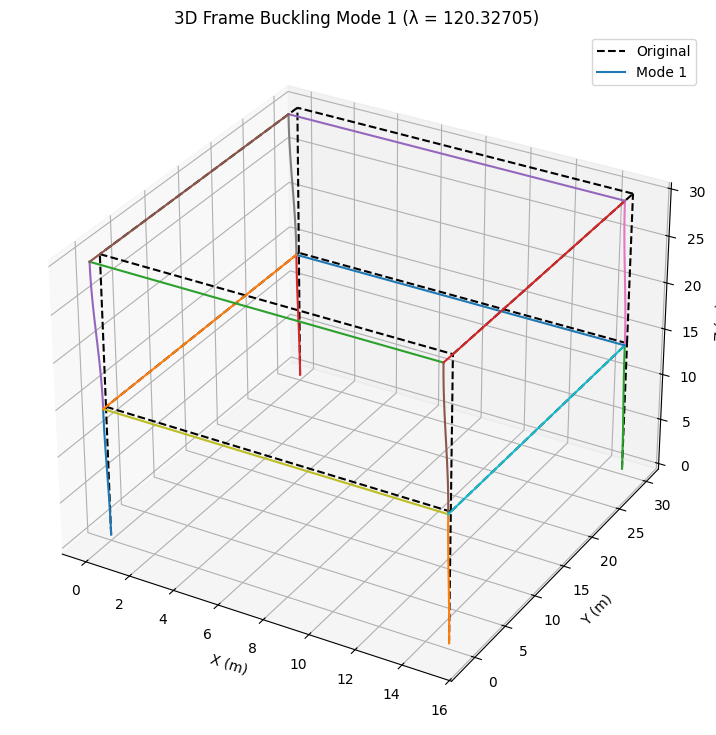

In [250]:
# Buckling analysis
eigvals, eigvecs, buckling_forces = solver.solve_buckling()

eigenvals = eigvals [:3]
print ('Elastic Critical Load Factor', eigenvals)
# Generate plot
plot_buckling_mode(beam, eigvecs, buckling_forces, eigvals)